# Adaptive Intelligence COM3240

### Assignment 2

#### Script that returns the learnign curve for each trial

In [16]:
import numpy as np
from matplotlib.pyplot import figure

#SARSA

def homing_nn(n_trials,n_steps,learning_rate,gamma):
    ## Definition of the environment
    N = 20                               #height of the gridworld ---> number of rows
    M = 20                              #length of the gridworld ---> number of columns
    N_states = N * M                    #total number of states
    states_matrix = np.eye(N_states)
    N_actions = 4                                           #number of possible actions in each state: 1->N 2->E 3->S 4->W
    action_row_change = np.array([-1,0,+1,0])               #number of cell shifted in vertical as a function of the action
    action_col_change = np.array([0,+1,0,-1])               #number of cell shifted in horizontal as a function of the action
    End = np.array([np.random.randint(19),np.random.randint(19)])      #terminal state--->reward, chosen randomly
    s_end = np.ravel_multi_index(End,dims=(N,M),order='F')  #terminal state. Conversion in single index

    ## Rewards
    R = 1                          #only when the robot reaches the charger, sited in End state

    ## Variables
    weights = np.random.rand(N_actions,N_states)
    learning_curve = np.zeros((1,n_trials))

    ## SARSA

    # Start trials
    for trial in range(n_trials):

        # Initialization
        Start = np.array([np.random.randint(N),np.random.randint(M)])   #random start
        s_start = np.ravel_multi_index(Start,dims=(N,M),order='F')      #conversion in single index
        state = Start                                                   #set current state
        s_index = s_start                                               #conversion in single index
        step = 0

        # Start steps
        while s_index != s_end and step <= n_steps:

            step += 1
            learning_curve[0,trial] = step

            input_vector = states_matrix[:,s_index].reshape(N_states,1)         #convert the state into an input vector

            #compute Qvalues. Qvalue=logsig(weights*input). 
            Q = 1 / ( 1 + np.exp( - weights.dot(input_vector))) 


            action = np.argmax(Q)                           #pick best action


            state_new = np.array([0,0])
            #move into a new state
            state_new[0] = state[0] + action_row_change[action]
            state_new[1] = state[1] + action_col_change[action]

            #put the robot back in grid if it goes out. Consider also the option to give a negative reward
            if state_new[0] < 0:
                state_new[0] = 0
            if state_new[0] >= N:
                state_new[0] = N-1
            if state_new[1] < 0:
                state_new[1] = 0
            if state_new[1] >= M:
                state_new[1] = M-1

            s_index_new = np.ravel_multi_index(state_new,dims=(N,M),order='F')  #conversion in a single index

            #update Qvalues. Only if is not the first step
            if step > 1:
                dw = learning_rate * (0 - Qprev + gamma * Q[action]) * output_old.dot(input_old.T) # r is 0 unless we reach goal
                weights = weights + dw
                
            #store variables for sarsa computation in the next step
            output = np.zeros((N_actions,1))
            output[action] = 1

            #update variables
            input_old = input_vector
            output_old = output
            Qprev = Q[action]

            state[0] = state_new[0]
            state[1] = state_new[1]
            s_index = s_index_new

            ## TODO: check if state is terminal and update the weights consequently
            if s_index == s_end:
                dw =  (R - Qprev) * output_old.dot(input_old.T)
                weights = weights + learning_rate * dw
            else:        
                pass


    return learning_curve


In [17]:
# from random import randint

# print (End)#terminal state--->reward
# s_end = np.ravel_multi_index(End,dims=(20,20),order='F')
# print(s_end)

(1, 4000)


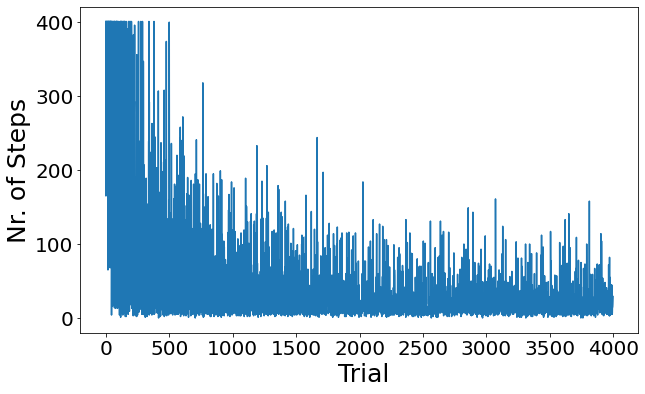

In [34]:
import matplotlib.pyplot as plt
import time





nTrials = 4000;     # should be integer >0
nSteps = 400;        # maximum number of allowed steps
learningRate = 0.4; # should be real, Greater than 0
gamma = 0.9;        # should be real, positive, smaller than 1


run = homing_nn(nTrials,nSteps,learningRate,gamma)
print(run.shape)


plt.figure(figsize=(10,6))
plt.tick_params(labelsize=20)
plt.xlabel(' Trial',fontsize=25)
plt.ylabel('Nr. of Steps',fontsize=25)
plt.plot(np.arange(nTrials),run[0])


# 
plt.show()


#### Call the function homing_nn


In [45]:

# Parameter setup
nrepetitions = 10;  # number of runs for the algorithm
nTrials = 300;     # should be integer >0
nSteps = 500;        # maximum number of allowed steps
learningRate = 0.5; # should be real, Greater than 0
gamma = 0.7;        # should be real, positive, smaller than 1
       # should be real, positive, smaller than 1



run = np.zeros((nrepetitions,nTrials))
for i in range(nrepetitions):
    run[i,:] = homing_nn(nTrials,nSteps,learningRate,gamma)
means = np.mean(run,axis=0)
errors = 2 * np.std(run, axis = 0) / np.sqrt(nrepetitions)







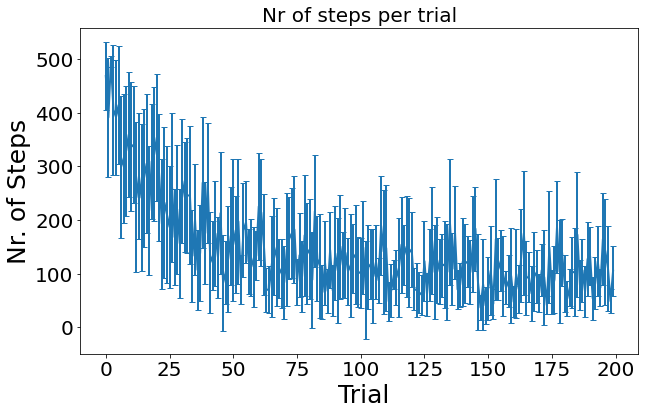

In [49]:
#plot figures
plt.figure(figsize=(10,6))
plt.title('Nr of steps per trial',fontsize=20)
plt.tick_params(labelsize=20)
plt.xlabel(' Trial',fontsize=25)
plt.ylabel('Nr. of Steps',fontsize=25)
plt.errorbar(np.arange(nTrials),means,errors,elinewidth = 2,capsize = 3,linewidth = 2)
plt.show()


In [21]:

######SARSA(λ)

def homing_lambda(n_trials,n_steps,learning_rate,gamma,lamb):
    ## Definition of the environment
    N = 20                               #height of the gridworld ---> number of rows
    M = 20                            #length of the gridworld ---> number of columns
    N_states = N * M                    #total number of states
    states_matrix = np.eye(N_states)
    N_actions = 4                                           #number of possible actions in each state: 1->N 2->E 3->S 4->W
    action_row_change = np.array([-1,0,+1,0])               #number of cell shifted in vertical as a function of the action
    action_col_change = np.array([0,+1,0,-1])               #number of cell shifted in horizontal as a function of the action
    End = np.array([np.random.randint(19),np.random.randint(19)])     
    s_end = np.ravel_multi_index(End,dims=(N,M),order='F')  #terminal state. Conversion in single index

    ## Rewards
    R = 1                              #only when the robot reaches the charger, sited in End state

    ## Variables
    weights = np.random.rand(N_actions,N_states)
    learning_curve = np.zeros((1,n_trials))
    e = np.zeros((N_actions,N_states)) 


    ## SARSA

    # Start trials
    for trial in range(n_trials):

        # Initialization
        Start = np.array([np.random.randint(N),np.random.randint(M)])   #random start
        s_start = np.ravel_multi_index(Start,dims=(N,M),order='F')      #conversion in single index
        state = Start                                                   #set current state
        s_index = s_start                                               #conversion in single index
        step = 0

        # Start steps
        while s_index != s_end and step <= n_steps:

            step += 1
            learning_curve[0,trial] = step

            input_vector = states_matrix[:,s_index].reshape(N_states,1)         #convert the state into an input vector

            #compute Qvalues. Qvalue=logsig(weights*input). 
            Q = 1 / ( 1 + np.exp( - weights.dot(input_vector))) 


            action = np.argmax(Q)                           #pick best action

            state_new = np.array([0,0])
            #move into a new state
            state_new[0] = state[0] + action_row_change[action]
            state_new[1] = state[1] + action_col_change[action]

            #put the robot back in grid if it goes out. Consider also the option to give a negative reward
            if state_new[0] < 0:
                state_new[0] = 0
            if state_new[0] >= N:
                state_new[0] = N-1
            if state_new[1] < 0:
                state_new[1] = 0
            if state_new[1] >= M:
                state_new[1] = M-1

            s_index_new = np.ravel_multi_index(state_new,dims=(N,M),order='F')  #conversion in a single index
            
            if step > 1:
                dw =  (0 - Qprev + gamma * Q[action]) * output_old.dot(input_old.T)
                e[action,s_index]+=1 
                weights += learning_rate * dw* e
                e = gamma*lamb*e + output_old.dot(input_old.T) # eij = γλe_ij + x_ix_j

                
                
            #store variables for sarsa computation in the next step
            output = np.zeros((N_actions,1))
            output[action] = 1

            #update variables
            input_old = input_vector
            output_old = output
            Qprev = Q[action]

            state[0] = state_new[0]
            state[1] = state_new[1]
            s_index = s_index_new

            ## check if state is terminal and update the weights consequently
            if s_index == s_end:
                dw =  (R - Qprev)
                e[action,s_index]+=1 
                weights = weights + learning_rate * dw *e
                e = gamma*lamb*e + output_old.dot(input_old.T)

                
                
            else:        
                pass


    return learning_curve

In [22]:

import matplotlib.pyplot as plt
import time
# Parameter setup
# nrepetitions = 10;  # number of runs for the algorithm
# nTrials = 100;     # should be integer >0
# nSteps = 500;        # maximum number of allowed steps
# learningRate = 0.5; # should be real, Greater than 0
# gamma = 0.9;        # should be real, positive, smaller than 1
#        # should be real, positive, smaller than 1
lamb = 0.9





runlambda = np.zeros((nrepetitions,nTrials))
# Calculate the average of steps for specific repetitions
for i in range(nrepetitions):
    runlambda[i,:] = homing_lambda(nTrials,nSteps,learningRate,gamma,lamb)
lmeans = np.mean(runlambda,axis=0)
lerrors = 2 * np.std(runlambda, axis = 0) / np.sqrt(nrepetitions)





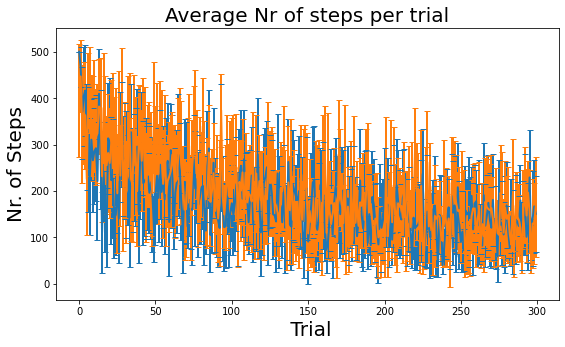

In [23]:

#plot 

plt.figure(figsize=(10,6))

plt.title('Average Nr of steps per trial',fontsize=20)
plt.tick_params(labelsize=20)
plt.xlabel(' Trial',fontsize=25)
plt.ylabel('Nr. of Steps',fontsize=25
plt.errorbar(np.arange(nTrials),lmeans,lerrors,elinewidth = 2,capsize = 3,linewidth = 2)
plt.errorbar(np.arange(nTrials),means,errors,elinewidth = 2,capsize = 3,linewidth = 2)

plt.show()

In [26]:
##################COMPARISON BETWEEN SARSA AND SARSA(lambda)#####################

plt.figure(figsize=(10,6))

plt.title('Average Nr. of Steps per Trial',fontsize=20)
plt.tick_params(labelsize=20)
plt.xlabel(' Trial',fontsize=25)
plt.ylabel('Nr. of Steps',fontsize=25
plt.errorbar(np.arange(nTrials),means,errors,elinewidth = 2,capsize = 2,linewidth = 2,label='SARSA')
plt.errorbar(np.arange(nTrials),lmeans,lerrors,elinewidth = 2,capsize = 2,linewidth = 2,label = 'SARSA(lambda)')

plt.show()



In [9]:
def homing_nn_epsilon(n_trials,n_steps,learning_rate,eps,gamma):
    ## Definition of the environment
    N = 20                               #height of the gridworld ---> number of rows
    M = 20                              #length of the gridworld ---> number of columns
    N_states = N * M                    #total number of states
    states_matrix = np.eye(N_states)
    N_actions = 4                                           #number of possible actions in each state: 1->N 2->E 3->S 4->W
    action_row_change = np.array([-1,0,+1,0])               #number of cell shifted in vertical as a function of the action
    action_col_change = np.array([0,+1,0,-1])               #number of cell shifted in horizontal as a function of the action
    End = np.array([np.random.randint(19),np.random.randint(19)])   #terminal state (chosen randomly)--->reward
    s_end = np.ravel_multi_index(End,dims=(N,M),order='F')  #terminal state. Conversion in single index

    ## Rewards
    R = 1                          #only when the robot reaches the charger, sited in End state

    ## Variables
    weights = np.random.rand(N_actions,N_states)
    learning_curve = np.zeros((1,n_trials))

    ## SARSA

    # Start trials
    for trial in range(n_trials):

        # Initialization
        Start = np.array([np.random.randint(N),np.random.randint(M)])   #random start
        s_start = np.ravel_multi_index(Start,dims=(N,M),order='F')      #conversion in single index
        state = Start                                                   #set current state
        s_index = s_start                                               #conversion in single index
        step = 0

        # Start steps
        while s_index != s_end and step <= n_steps:

            step += 1
            learning_curve[0,trial] = step

            input_vector = states_matrix[:,s_index].reshape(N_states,1)         #convert the state into an input vector

            #compute Qvalues. Qvalue=logsig(weights*input). 
            Q = 1 / ( 1 + np.exp( - weights.dot(input_vector))) 


            #eps-greedy policy implementation
            greedy = (np.random.rand() > eps)               #0--->greedy action 1--->non-greedy action
            if greedy:
                action = np.argmax(Q)                           #pick best action
            else:
                action = np.random.randint(N_actions)           #pick random action
                
            state_new = np.array([0,0])
            #move into a new state
            state_new[0] = state[0] + action_row_change[action]
            state_new[1] = state[1] + action_col_change[action]

            #put the robot back in grid if it goes out. Consider also the option to give a negative reward
            if state_new[0] < 0:
                state_new[0] = 0
            if state_new[0] >= N:
                state_new[0] = N-1
            if state_new[1] < 0:
                state_new[1] = 0
            if state_new[1] >= M:
                state_new[1] = M-1

            s_index_new = np.ravel_multi_index(state_new,dims=(N,M),order='F')  #conversion in a single index

            ##  update Qvalues. Only if is not the first step
            if step > 1:
                dw = learning_rate * (0 - Qprev + gamma * Q[action]) * output_old.dot(input_old.T) # r is 0 unless we reach goal
                weights = weights + dw 
            #store variables for sarsa computation in the next step
            output = np.zeros((N_actions,1))
            output[action] = 1

            #update variables
            input_old = input_vector
            output_old = output
            Qprev = Q[action]

            state[0] = state_new[0]
            state[1] = state_new[1]
            s_index = s_index_new

            ##  check if state is terminal and update the weights consequently
            if s_index == s_end:
                dw = learning_rate * (R - Qprev) * output_old.dot(input_old.T)
                weights += dw
            else:        
                pass


    return learning_curve





def homing_lambda_epsilon(n_trials,n_steps,learning_rate,eps,gamma,lamb):
    ## Definition of the environment
    N = 20                               #height of the gridworld ---> number of rows
    M = 20                            #length of the gridworld ---> number of columns
    N_states = N * M                    #total number of states
    states_matrix = np.eye(N_states)
    N_actions = 4                                           #number of possible actions in each state: 1->N 2->E 3->S 4->W
    action_row_change = np.array([-1,0,+1,0])               #number of cell shifted in vertical as a function of the action
    action_col_change = np.array([0,+1,0,-1])               #number of cell shifted in horizontal as a function of the action
    End = np.array([np.random.randint(19),np.random.randint(19)])     
    s_end = np.ravel_multi_index(End,dims=(N,M),order='F')  #terminal state. Conversion in single index

    ## Rewards
    R = 1                              #only when the robot reaches the charger, sited in End state

    ## Variables
    weights = np.random.rand(N_actions,N_states)
    learning_curve = np.zeros((1,n_trials))
    e = np.zeros((N_actions,N_states)) 


    ## SARSA

    # Start trials
    for trial in range(n_trials):

        # Initialization
        Start = np.array([np.random.randint(N),np.random.randint(M)])   #random start
        s_start = np.ravel_multi_index(Start,dims=(N,M),order='F')      #conversion in single index
        state = Start                                                   #set current state
        s_index = s_start                                               #conversion in single index
        step = 0

        # Start steps
        while s_index != s_end and step <= n_steps:

            step += 1
            learning_curve[0,trial] = step

            input_vector = states_matrix[:,s_index].reshape(N_states,1)         #convert the state into an input vector

            #compute Qvalues. Qvalue=logsig(weights*input). 
            Q = 1 / ( 1 + np.exp( - weights.dot(input_vector))) 

            #eps-greedy policy implementation
            greedy = (np.random.rand() > eps)               #0--->greedy action 1--->non-greedy action
            if greedy:
                action = np.argmax(Q)                           #pick best action
            else:
                action = np.random.randint(N_actions)           #pick random action
                
            

                
                
            state_new = np.array([0,0])
            #move into a new state
            state_new[0] = state[0] + action_row_change[action]
            state_new[1] = state[1] + action_col_change[action]

            #put the robot back in grid if it goes out. Consider also the option to give a negative reward
            if state_new[0] < 0:
                state_new[0] = 0
            if state_new[0] >= N:
                state_new[0] = N-1
            if state_new[1] < 0:
                state_new[1] = 0
            if state_new[1] >= M:
                state_new[1] = M-1

            s_index_new = np.ravel_multi_index(state_new,dims=(N,M),order='F')  #conversion in a single index


            ##  update Qvalues. Only if is not the first step
            
            #weight update
            if step > 1:
                dw =  (0 - Qprev + gamma * Q[action]) * output_old.dot(input_old.T)
                e[action,s_index]+=1 
                weights += learning_rate * dw* e
                e = gamma*lamb*e + output_old.dot(input_old.T) # eij = γλe_ij + x_ix_j

                
                
            #store variables for sarsa computation in the next step
            output = np.zeros((N_actions,1))
            output[action] = 1

            #update variables
            input_old = input_vector
            output_old = output
            Qprev = Q[action]

            state[0] = state_new[0]
            state[1] = state_new[1]
            s_index = s_index_new

            ##  check if state is terminal and update the weights consequently
            if s_index == s_end:
                dw =  (R - Qprev)
                e[action,s_index]+=1 
                weights = weights + learning_rate * dw *e
                e = gamma*lamb*e + output_old.dot(input_old.T)

                
                
            else:        
                pass


    return learning_curve

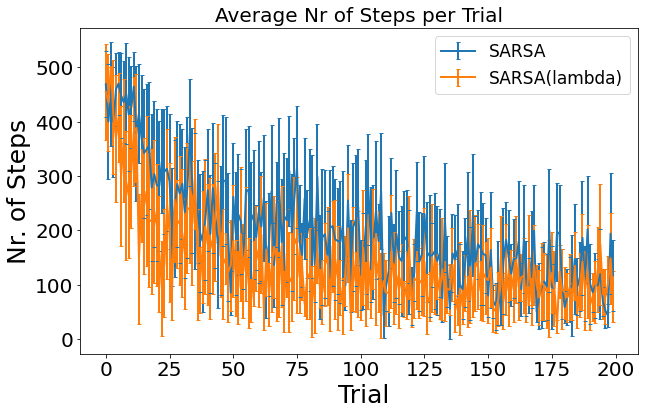

In [77]:
            ####---------------------COMPARE GREEDY VS NON GREEDY APPROACH-----------------------####
    
    
nrepetitions = 10;  # number of runs for the algorithm
nTrials = 200;     # should be integer >0
nSteps = 500;        # maximum number of allowed steps
learningRate = 0.5; # should be real, Greater than 0
gamma = 0.9;        # should be real, positive, smaller than 1
lamb = 0.9
epsilon = 0




run = np.zeros((nrepetitions,nTrials))
# Calculate the average of steps for specific repetitions
for i in range(nrepetitions):
    run[i] = homing_nn_epsilon(nTrials,nSteps,learningRate,0.01,gamma)
means = np.mean(run,axis=0)
errors = 2 * np.std(run, axis = 0) / np.sqrt(nrepetitions)




runlambda = np.zeros((nrepetitions,nTrials))
# Calculate the average of steps for specific repetitions
for i in range(nrepetitions):
    runlambda[i] = homing_lambda_epsilon(nTrials,nSteps,learningRate,0,gamma,lamb)
lmeans = np.mean(runlambda,axis=0)
lerrors = 2 * np.std(runlambda, axis = 0) / np.sqrt(nrepetitions)


plt.figure(figsize=(10,6))

plt.title('Average Nr of Steps per Trial',fontsize=20)
plt.tick_params(labelsize=20)
plt.xlabel(' Trial',fontsize=25)
plt.ylabel('Nr. of Steps',fontsize=25)

plt.errorbar(np.arange(nTrials),means,errors,elinewidth = 2,capsize = 2,linewidth = 2,label='SARSA')
plt.errorbar(np.arange(nTrials),lmeans,lerrors,elinewidth = 2,capsize = 2,linewidth = 2,label = 'SARSA(lambda)')

plt.legend(prop={'size': 17})
plt.show()





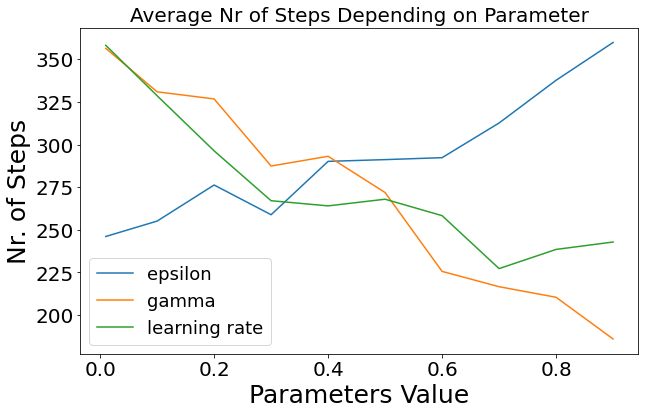

In [79]:
#######----------------------compare parameter performance---------------------###################
#### ---- takes very long to compute


plt.figure(figsize=(10,6))
#################################################################
## for epsilon
##################################################################
nrepetitions = 10;  # number of runs for the algorithm
nTrials = 200;     # should be integer >0
nSteps = 500;        # maximum number of allowed steps
learningRate = 0.5; # should be real, Greater than 0
gamma = 0.5;        # should be real, positive, smaller than 1
lamb = 0.5
epsilon = [0.01,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]



lmeans = np.zeros(10)
lerrors = np.zeros(10)


runlambda = np.zeros((nrepetitions,nTrials))

for i in range (10):
    for j in range(nrepetitions):
        runlambda[j] = homing_nn_epsilon(nTrials,nSteps,learningRate,epsilon[i],gamma)
    lmeans[i] = np.mean(runlambda)
    lerrors[i] = 2 * np.std(runlambda) / np.sqrt(nrepetitions)
e  = np.mean(lmeans,axis=0)
er = np.mean(lerrors,axis=0)

plt.plot([0.01,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9], lmeans,label = 'epsilon')


###########################################################################################
# for gamma
############################################################################################

nrepetitions = 10;  # number of runs for the algorithm
nTrials = 200;     # should be integer >0
nSteps = 500;        # maximum number of allowed steps
learningRate = 0.5; # should be real, Greater than 0
epsilon = 0.1
gamma=[0.01,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]


runlambda = np.zeros((nrepetitions,nTrials))

for i in range (10):
    for j in range(nrepetitions):
        runlambda[j] = homing_nn_epsilon(nTrials,nSteps,learningRate,epsilon,gamma[i])
    lmeans[i] = np.mean(runlambda)
    lerrors[i] = 2 * np.std(runlambda) / np.sqrt(nrepetitions)

plt.plot([0.01,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9], lmeans, label = 'gamma')
# plt.show()

##########################################################################################
#for learning rate
############################################################################################
nrepetitions = 10;  # number of runs for the algorithm
nTrials = 200;     # should be integer >0
nSteps = 500;        # maximum number of allowed steps
learningRate =  [0.01,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]
epsilon = 0.1
gamma=0.5



runlambda = np.zeros((nrepetitions,nTrials))

for i in range (10):
    for j in range(nrepetitions):
        runlambda[j] = homing_nn_epsilon(nTrials,nSteps,learningRate[i],epsilon,gamma)
    lmeans[i] = np.mean(runlambda)
    lerrors[i] = 2 * np.std(runlambda) / np.sqrt(nrepetitions)






plt.plot([0.01,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9], lmeans, label = 'learning rate')


plt.title('Average Nr of Steps Depending on Parameter',fontsize=20)
plt.xlabel(' Parameters Value ',fontsize=25)
plt.ylabel('Nr. of Steps',fontsize=25)
plt.tick_params(labelsize=20)

plt.legend(prop={'size': 18})

plt.show()

In [24]:


#increades number of possible actions
def homing_nn_epsilon8(n_trials,n_steps,learning_rate,eps,gamma):
    ## Definition of the environment
    N = 20                               #height of the gridworld ---> number of rows
    M = 20                              #length of the gridworld ---> number of columns
    N_states = N * M                    #total number of states
    states_matrix = np.eye(N_states)
    N_actions = 8                                           #number of possible actions in each state: 1->N 2->E 3->S 4->W
    action_row_change = np.array([-1,-1,0,+1,+1,+1,-1,0])               #number of cell shifted in vertical as a function of the action
    action_col_change = np.array([0,+1,+1,+1,0,-1,-1,-1])             #number of cell shifted in horizontal as a function of the action
    End = np.array([np.random.randint(19),np.random.randint(19)])   #terminal state (chosen randomly)--->reward
    s_end = np.ravel_multi_index(End,dims=(N,M),order='F')  #terminal state. Conversion in single index

    ## Rewards
    R = 1                          #only when the robot reaches the charger, sited in End state

    ## Variables
    weights = np.random.rand(N_actions,N_states)
    learning_curve = np.zeros((1,n_trials))

    ## SARSA

    # Start trials
    for trial in range(n_trials):

        # Initialization
        Start = np.array([np.random.randint(N),np.random.randint(M)])   #random start
        s_start = np.ravel_multi_index(Start,dims=(N,M),order='F')      #conversion in single index
        state = Start                                                   #set current state
        s_index = s_start                                               #conversion in single index
        step = 0

        # Start steps
        while s_index != s_end and step <= n_steps:

            step += 1
            learning_curve[0,trial] = step

            input_vector = states_matrix[:,s_index].reshape(N_states,1)         #convert the state into an input vector

            #compute Qvalues. Qvalue=logsig(weights*input). 
            Q = 1 / ( 1 + np.exp( - weights.dot(input_vector))) 


            #eps-greedy policy implementation
            greedy = (np.random.rand() > eps)               #0--->greedy action 1--->non-greedy action
            if greedy:
                action = np.argmax(Q)                           #pick best action
            else:
                action = np.random.randint(N_actions)           #pick random action
                
            state_new = np.array([0,0])
            #move into a new state
            state_new[0] = state[0] + action_row_change[action]
            state_new[1] = state[1] + action_col_change[action]

            #put the robot back in grid if it goes out. Consider also the option to give a negative reward
            if state_new[0] < 0:
                state_new[0] = 0
            if state_new[0] >= N:
                state_new[0] = N-1
            if state_new[1] < 0:
                state_new[1] = 0
            if state_new[1] >= M:
                state_new[1] = M-1

            s_index_new = np.ravel_multi_index(state_new,dims=(N,M),order='F')  #conversion in a single index

            ##update Qvalues. Only if is not the first step
            if step > 1:
                dw = learning_rate * (0 - Qprev + gamma * Q[action]) * output_old.dot(input_old.T) # r is 0 unless we reach goal
                weights = weights + dw 
                
            #store variables for sarsa computation in the next step
            output = np.zeros((N_actions,1))
            output[action] = 1

            #update variables
            input_old = input_vector
            output_old = output
            Qprev = Q[action]

            state[0] = state_new[0]
            state[1] = state_new[1]
            s_index = s_index_new

            ## check if state is terminal and update the weights consequently
            if s_index == s_end:
                dw = learning_rate * (R - Qprev) * output_old.dot(input_old.T)
                weights += dw
            else:        
                pass


    return learning_curve

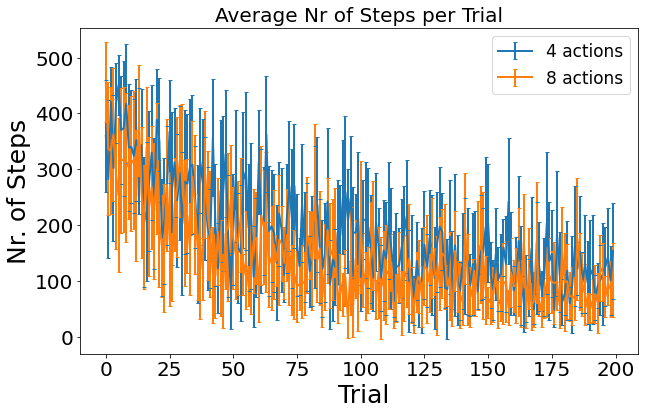

In [73]:
nrepetitions = 10;  # number of runs for the algorithm
nTrials = 200;     # should be integer >0
nSteps = 500;        # maximum number of allowed steps
learningRate = 0.5; # should be real, Greater than 0
gamma = 0.9;        # should be real, positive, smaller than 1
lamb = 0.9
epsilon = 0.01





run = np.zeros((nrepetitions,nTrials))
# Calculate the average of steps for specific repetitions
for i in range(nrepetitions):
    run[i] = homing_nn_epsilon(nTrials,nSteps,learningRate,epsilon,gamma)
means = np.mean(run,axis=0)
errors = 2 * np.std(run, axis = 0) / np.sqrt(nrepetitions)




runlambda = np.zeros((nrepetitions,nTrials))
# Calculate the average of steps for specific repetitions
for i in range(nrepetitions):
    runlambda[i] = homing_nn_epsilon8(nTrials,nSteps,learningRate,epsilon,gamma)
lmeans = np.mean(runlambda,axis=0)
lerrors = 2 * np.std(runlambda, axis = 0) / np.sqrt(nrepetitions)




plt.figure(figsize=(10,6))

plt.title('Average Nr of Steps per Trial',fontsize=20)
plt.tick_params(labelsize=20)
plt.xlabel(' Trial',fontsize=25)
plt.ylabel('Nr. of Steps',fontsize=25)
plt.errorbar(np.arange(nTrials),means,errors,elinewidth = 2,capsize = 2,linewidth = 2,label='4 actions')
plt.errorbar(np.arange(nTrials),lmeans,lerrors,elinewidth = 2,capsize = 2,linewidth = 2,label = '8 actions')
plt.legend(prop={'size': 17})
plt.show()


In [50]:

# more rewards added
def homing_nn_epsilon_reward(n_trials,n_steps,learning_rate,eps,gamma,lamb):
    ## Definition of the environment
    N = 20                               #height of the gridworld ---> number of rows
    M = 20                              #length of the gridworld ---> number of columns
    N_states = N * M                    #total number of states
    states_matrix = np.eye(N_states)
    N_actions = 4                                           #number of possible actions in each state: 1->N 2->E 3->S 4->W
    action_row_change = np.array([-1,0,+1,0])               #number of cell shifted in vertical as a function of the action
    action_col_change = np.array([0,+1,0,-1])             #number of cell shifted in horizontal as a function of the action
    End = np.array([np.random.randint(19),np.random.randint(19)])   #terminal state (chosen randomly)--->reward
    s_end = np.ravel_multi_index(End,dims=(N,M),order='F')  #terminal state. Conversion in single index
    
    End2 = np.array([np.random.randint(19),np.random.randint(19)])   #terminal state (chosen randomly)--->reward
    s_end2 = np.ravel_multi_index(End2,dims=(N,M),order='F')  #terminal state. Conversion in single index
    
    End3 = np.array([np.random.randint(19),np.random.randint(19)])   #terminal state (chosen randomly)--->reward
    s_end3 = np.ravel_multi_index(End3,dims=(N,M),order='F')  #terminal state. Conversion in single index
    
    End4 = np.array([np.random.randint(19),np.random.randint(19)])  #terminal state (chosen randomly)--->reward
    s_end4 = np.ravel_multi_index(End4,dims=(N,M),order='F')  #terminal state. Conversion in single index
    
    End5 = np.array([np.random.randint(19),np.random.randint(19)])   #terminal state (chosen randomly)--->reward
    s_end5 = np.ravel_multi_index(End5,dims=(N,M),order='F')  #terminal state. Conversion in single index

    ## Rewards
    R = 1                          #only when the robot reaches the charger, sited in End state
    R2 = 6
    R3 = 11
    R4 = 16
    R5 = 21
    ## Variables
    weights = np.random.rand(N_actions,N_states)
    learning_curve = np.zeros((1,n_trials))
    e = np.zeros((N_actions,N_states)) 

    ## SARSA
    Rewards = np.zeros((1,n_trials))
    rOld = 0
    # Start trials
    for trial in range(n_trials):

        # Initialization
        Start = np.array([np.random.randint(N),np.random.randint(M)])   #random start
        s_start = np.ravel_multi_index(Start,dims=(N,M),order='F')      #conversion in single index
        state = Start                                                   #set current state
        s_index = s_start                                               #conversion in single index
        step = 0
        rOld = 0
        # Start steps
        while s_index != s_end and s_index != s_end2  and s_index != s_end3 and s_index != s_end4 and s_index != s_end5 and step <= n_steps:

            step += 1
            learning_curve[0,trial] = step
            input_vector = states_matrix[:,s_index].reshape(N_states,1)         #convert the state into an input vector

            #compute Qvalues. Qvalue=logsig(weights*input). 
            Q = 1 / ( 1 + np.exp( - weights.dot(input_vector))) 


            #eps-greedy policy implementation
            greedy = (np.random.rand() > eps)               #0--->greedy action 1--->non-greedy action
            if greedy:
                action = np.argmax(Q)                           #pick best action
            else:
                action = np.random.randint(N_actions)           #pick random action
                
            state_new = np.array([0,0])
            #move into a new state
            state_new[0] = state[0] + action_row_change[action]
            state_new[1] = state[1] + action_col_change[action]

            #put the robot back in grid if it goes out. Consider also the option to give a negative reward
            if state_new[0] < 0:
                state_new[0] = 0
            if state_new[0] >= N:
                state_new[0] = N-1
            if state_new[1] < 0:
                state_new[1] = 0
            if state_new[1] >= M:
                state_new[1] = M-1

            s_index_new = np.ravel_multi_index(state_new,dims=(N,M),order='F')  #conversion in a single index

            ##  update Qvalues. Only if is not the first step
            if step > 1:
                dw =  (rOld - Qprev + gamma * Q[action]) * output_old.dot(input_old.T)
                e[action,s_index]+=1 
                weights += learning_rate * dw* e
                e = gamma*lamb*e + output_old.dot(input_old.T) # eij = γλe_ij + x_ix_j
            #store variables for sarsa computation in the next step
            output = np.zeros((N_actions,1))
            output[action] = 1

            #update variables
            input_old = input_vector
            output_old = output
            Qprev = Q[action]
            
            
            state[0] = state_new[0]
            state[1] = state_new[1]
            s_index = s_index_new

            ##  check if state is terminal and update the weights consequently
            if s_index == s_end:
                dw =  (R - Qprev)
                e[action,s_index]+=1 
                weights = weights + learning_rate * dw *e
                e = gamma*lamb*e + output_old.dot(input_old.T)
                rOld = R
            elif s_index == s_end2:
                dw =  (R2 - Qprev)
                e[action,s_index]+=1 
                weights = weights + learning_rate * dw *e
                e = gamma*lamb*e + output_old.dot(input_old.T)
                rOld = R2
            elif s_index == s_end3:
                dw =  (R3 - Qprev)
                e[action,s_index]+=1 
                weights = weights + learning_rate * dw *e
                e = gamma*lamb*e + output_old.dot(input_old.T)
                rOld = R3
            elif s_index == s_end4:
                dw =  (R4 - Qprev)
                e[action,s_index]+=1 
                weights = weights + learning_rate * dw *e
                e = gamma*lamb*e + output_old.dot(input_old.T)
                rOld = R4
            elif s_index == s_end5:
                dw =  (R5 - Qprev)
                e[action,s_index]+=1 
                weights = weights + learning_rate * dw *e
                e = gamma*lamb*e + output_old.dot(input_old.T)
                rOld = R5

            else:        
                pass

        Rewards[0,trial] = rOld
    return Rewards


## not random version with multiple rewards
def homing_rewards_notrandom(n_trials,n_steps,learning_rate,eps,gamma,lamb):
    ## Definition of the environment
    N = 20                               #height of the gridworld ---> number of rows
    M = 20                              #length of the gridworld ---> number of columns
    N_states = N * M                    #total number of states
    states_matrix = np.eye(N_states)
    N_actions = 4                                           #number of possible actions in each state: 1->N 2->E 3->S 4->W
    action_row_change = np.array([-1,0,+1,0])               #number of cell shifted in vertical as a function of the action
    action_col_change = np.array([0,+1,0,-1])             #number of cell shifted in horizontal as a function of the action
    End = np.array([np.random.randint(19),np.random.randint(19)])   #terminal state (chosen randomly)--->reward
    s_end = np.ravel_multi_index(End,dims=(N,M),order='F')  #terminal state. Conversion in single index
    
    End2 = np.array([np.random.randint(19),np.random.randint(19)])   #terminal state (chosen randomly)--->reward
    s_end2 = np.ravel_multi_index(End2,dims=(N,M),order='F')  #terminal state. Conversion in single index
    
    End3 = np.array([np.random.randint(19),np.random.randint(19)])   #terminal state (chosen randomly)--->reward
    s_end3 = np.ravel_multi_index(End3,dims=(N,M),order='F')  #terminal state. Conversion in single index
    
    End4 = np.array([np.random.randint(19),np.random.randint(19)])  #terminal state (chosen randomly)--->reward
    s_end4 = np.ravel_multi_index(End4,dims=(N,M),order='F')  #terminal state. Conversion in single index
    
    End5 = np.array([np.random.randint(19),np.random.randint(19)])   #terminal state (chosen randomly)--->reward
    s_end5 = np.ravel_multi_index(End5,dims=(N,M),order='F')  #terminal state. Conversion in single index

    ## Rewards
    R = 1                          #only when the robot reaches the charger, sited in End state
    R2 = 6
    R3 = 11
    R4 = 16
    R5 = 21
    ## Variables
    weights = np.random.rand(N_actions,N_states)
    learning_curve = np.zeros((1,n_trials))
    e = np.zeros((N_actions,N_states)) 

    ## SARSA
    Rewards = np.zeros((1,n_trials))
    rOld = 0
    # Start trials
    for trial in range(n_trials):

        # Initialization
        Start = np.array([10,10])   #random start
        s_start = np.ravel_multi_index(Start,dims=(N,M),order='F')      #conversion in single index
        state = Start                                                   #set current state
        s_index = s_start                                               #conversion in single index
        step = 0
        rOld = 0
        # Start steps
        while s_index != s_end and s_index != s_end2  and s_index != s_end3 and s_index != s_end4 and s_index != s_end5 and step <= n_steps:

            step += 1
            learning_curve[0,trial] = step
            input_vector = states_matrix[:,s_index].reshape(N_states,1)         #convert the state into an input vector

            #compute Qvalues. Qvalue=logsig(weights*input). 
            Q = 1 / ( 1 + np.exp( - weights.dot(input_vector))) 


            #eps-greedy policy implementation
            greedy = (np.random.rand() > eps)               #0--->greedy action 1--->non-greedy action
            if greedy:
                action = np.argmax(Q)                           #pick best action
            else:
                action = np.random.randint(N_actions)           #pick random action
                
            state_new = np.array([0,0])
            #move into a new state
            state_new[0] = state[0] + action_row_change[action]
            state_new[1] = state[1] + action_col_change[action]

            #put the robot back in grid if it goes out. Consider also the option to give a negative reward
            if state_new[0] < 0:
                state_new[0] = 0
            if state_new[0] >= N:
                state_new[0] = N-1
            if state_new[1] < 0:
                state_new[1] = 0
            if state_new[1] >= M:
                state_new[1] = M-1

            s_index_new = np.ravel_multi_index(state_new,dims=(N,M),order='F')  #conversion in a single index

            ## update Qvalues. Only if is not the first step
            if step > 1:
                dw =  (rOld - Qprev + gamma * Q[action]) * output_old.dot(input_old.T)
                e[action,s_index]+=1 
                weights += learning_rate * dw* e
                e = gamma*lamb*e + output_old.dot(input_old.T) # eij = γλe_ij + x_ix_j
            #store variables for sarsa computation in the next step
            output = np.zeros((N_actions,1))
            output[action] = 1

            #update variables
            input_old = input_vector
            output_old = output
            Qprev = Q[action]
            
            
            state[0] = state_new[0]
            state[1] = state_new[1]
            s_index = s_index_new

            ## check if state is terminal and update the weights consequently
            if s_index == s_end:
                dw =  (R - Qprev)
                e[action,s_index]+=1 
                weights = weights + learning_rate * dw *e
                e = gamma*lamb*e + output_old.dot(input_old.T)
                rOld = R
            elif s_index == s_end2:
                dw =  (R2 - Qprev)
                e[action,s_index]+=1 
                weights = weights + learning_rate * dw *e
                e = gamma*lamb*e + output_old.dot(input_old.T)
                rOld = R2
            elif s_index == s_end3:
                dw =  (R3 - Qprev)
                e[action,s_index]+=1 
                weights = weights + learning_rate * dw *e
                e = gamma*lamb*e + output_old.dot(input_old.T)
                rOld = R3
            elif s_index == s_end4:
                dw =  (R4 - Qprev)
                e[action,s_index]+=1 
                weights = weights + learning_rate * dw *e
                e = gamma*lamb*e + output_old.dot(input_old.T)
                rOld = R4
            elif s_index == s_end5:
                dw =  (R5 - Qprev)
                e[action,s_index]+=1 
                weights = weights + learning_rate * dw *e
                e = gamma*lamb*e + output_old.dot(input_old.T)
                rOld = R5

            else:        
                pass

        Rewards[0,trial] = rOld
    return Rewards

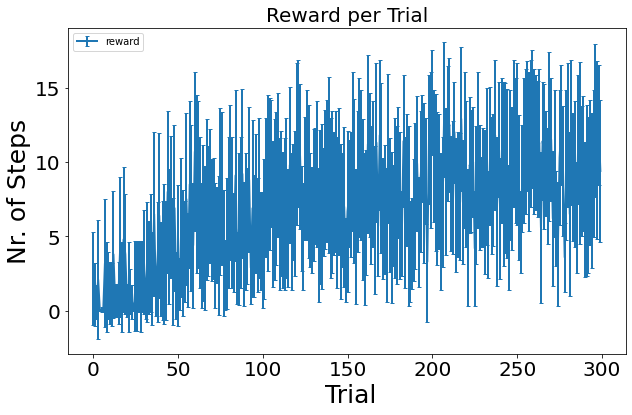

In [53]:
nrepetitions = 10;  # number of runs for the algorithm
nTrials = 300;     # should be integer >0
nSteps = 120;        # maximum number of allowed steps
learningRate = 0.1; # should be real, Greater than 0
gamma = 0.9;        # should be real, positive, smaller than 1
lamb = 0.9
epsilon = 0





run = np.zeros((nrepetitions,nTrials))
# Calculate the average of steps for specific repetitions
for i in range(nrepetitions):
    run[i] = homing_nn_epsilon_reward(nTrials,nSteps,learningRate,epsilon,gamma,lamb)
means = np.mean(run,axis=0)
errors = 2 * np.std(run, axis = 0) / np.sqrt(nrepetitions)


# run2 = homing_nn_epsilon_reward(nTrials,nSteps,learningRate,epsilon,gamma)


plt.figure(figsize=(10,6))

plt.title('Reward per Trial',fontsize=20)
plt.tick_params(labelsize=20)
plt.xlabel(' Trial',fontsize=25)
plt.ylabel('Nr. of Steps',fontsize=25)
plt.errorbar(np.arange(nTrials),means,errors,elinewidth = 2,capsize = 2,linewidth = 2,label='reward')


plt.legend()
plt.show()


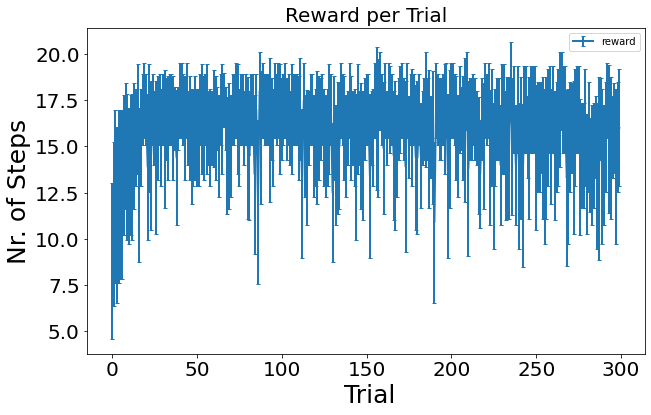

In [60]:
nrepetitions = 10;  # number of runs for the algorithm
nTrials = 200;     # should be integer >0
nSteps = 250;        # maximum number of allowed steps
learningRate = 0.6; # should be real, Greater than 0
gamma = 0.9;        # should be real, positive, smaller than 1
lamb = 0.9
epsilon = 0.2





run = np.zeros((nrepetitions,nTrials))
# Calculate the average of steps for specific repetitions
for i in range(nrepetitions):
    run[i] = homing_rewards_notrandom(nTrials,nSteps,learningRate,epsilon,gamma,lamb)
means = np.mean(run,axis=0)
errors = 2 * np.std(run, axis = 0) / np.sqrt(nrepetitions)


# run2 = homing_nn_epsilon_reward(nTrials,nSteps,learningRate,epsilon,gamma)


plt.figure(figsize=(10,6))

plt.title('Reward per Trial',fontsize=20)
plt.tick_params(labelsize=20)
plt.xlabel(' Trial',fontsize=25)
plt.ylabel('Nr. of Steps',fontsize=25)
plt.errorbar(np.arange(nTrials),means,errors,elinewidth = 2,capsize = 2,linewidth = 2,label='reward')


plt.legend()
plt.show()

In [61]:
# Deep Q-Learning

def homing_q(n_trials,n_steps,learning_rate,gamma):
    ## Definition of the environment
    N = 20                               #height of the gridworld ---> number of rows
    M = 20                              #length of the gridworld ---> number of columns
    N_states = N * M                    #total number of states
    states_matrix = np.eye(N_states)
    N_actions = 4                                           #number of possible actions in each state: 1->N 2->E 3->S 4->W
    action_row_change = np.array([-1,0,+1,0])               #number of cell shifted in vertical as a function of the action
    action_col_change = np.array([0,+1,0,-1])               #number of cell shifted in horizontal as a function of the action
    End = np.array([np.random.randint(19),np.random.randint(19)])     
                                  #terminal state--->reward
    s_end = np.ravel_multi_index(End,dims=(N,M),order='F')  #terminal state. Conversion in single index

    ## Rewards
    R = 1                          #only when the robot reaches the charger, sited in End state

    ## Variables
    weights = np.random.rand(N_actions,N_states)
    learning_curve = np.zeros((1,n_trials))

    ## SARSA

    # Start trials
    for trial in range(n_trials):

        # Initialization
        Start = np.array([np.random.randint(N),np.random.randint(M)])   #random start
        s_start = np.ravel_multi_index(Start,dims=(N,M),order='F')      #conversion in single index
        state = Start                                                   #set current state
        s_index = s_start                                               #conversion in single index
        step = 0

        # Start steps
        while s_index != s_end and step <= n_steps:

            step += 1
            learning_curve[0,trial] = step

            input_vector = states_matrix[:,s_index].reshape(N_states,1)         #convert the state into an input vector

            #compute Qvalues. Qvalue=logsig(weights*input). Qvalue is 2x1, one value for each output neuron
            Q = 1 / ( 1 + np.exp( - weights.dot(input_vector))) 


            action = np.argmax(Q)                           #pick best action
        

            state_new = np.array([0,0])
            #move into a new state
            state_new[0] = state[0] + action_row_change[action]
            state_new[1] = state[1] + action_col_change[action]

            #put the robot back in grid if it goes out. Consider also the option to give a negative reward
            if state_new[0] < 0:
                state_new[0] = 0
            if state_new[0] >= N:
                state_new[0] = N-1
            if state_new[1] < 0:
                state_new[1] = 0
            if state_new[1] >= M:
                state_new[1] = M-1

            s_index_new = np.ravel_multi_index(state_new,dims=(N,M),order='F')  #conversion in a single index

            ## TODO update Qvalues. Only if is not the first step
            if step > 1:
                dw = learning_rate * (0 - Qprev + gamma * np.max(Q)) * output_old.dot(input_old.T) # r is 0 unless we reach goal
                weights = weights + dw 
            #store variables for sarsa computation in the next step
            output = np.zeros((N_actions,1))
            output[action] = 1

            #update variables
            input_old = input_vector
            output_old = output
            Qprev = Q[action]

            state[0] = state_new[0]
            state[1] = state_new[1]
            s_index = s_index_new

            ## TODO: check if state is terminal and update the weights consequently
            if s_index == s_end:
                dw =  (R - Qprev) * output_old.dot(input_old.T)
                weights = weights + learning_rate * dw
            else:        
                pass


    return learning_curve

In [71]:
nrepetitions = 10;  # number of runs for the algorithm
nTrials = 200;     # should be integer >0
nSteps = 500;        # maximum number of allowed steps
learningRate = 0.6; # should be real, Greater than 0
gamma = 0.7;        # should be real, positive, smaller than 1
       # should be real, positive, smaller than 1
lamb = 0.9
epsilon = 0.2

run = np.zeros((nrepetitions,nTrials))
# Calculate the average of steps for specific repetitions
for i in range(nrepetitions):
    run[i,:] = homing_q(nTrials,nSteps,learningRate,gamma)
means = np.mean(run,axis=0)
errors = 2 * np.std(run, axis = 0) / np.sqrt(nrepetitions)


runlambda = np.zeros((nrepetitions,nTrials))
# Calculate the average of steps for specific repetitions
for i in range(nrepetitions):
    runlambda[i,:] = homing_nn_epsilon(nTrials,nSteps,learningRate,gamma,epsilon)
lmeans = np.mean(runlambda,axis=0)
lerrors = 2 * np.std(runlambda, axis = 0) / np.sqrt(nrepetitions)



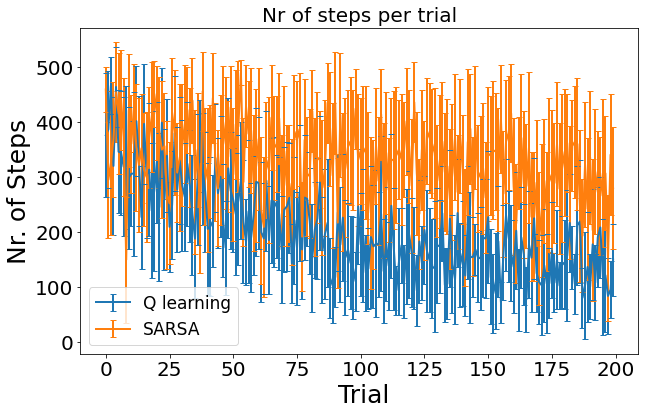

In [72]:
plt.figure(figsize=(10,6))

plt.title('Nr of steps per trial',fontsize=20)
plt.tick_params(labelsize=20)
plt.xlabel(' Trial',fontsize=25)
plt.ylabel('Nr. of Steps',fontsize=25)
plt.errorbar(np.arange(nTrials),means,errors,elinewidth = 2,capsize = 3,linewidth = 2,label ='Q learning')

plt.errorbar(np.arange(nTrials),lmeans,lerrors,elinewidth = 2,capsize = 3,linewidth = 2,label = 'SARSA')
plt.legend(prop={'size': 17})

plt.show()